Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

load dataset

In [5]:
insurance_predict_data = pd.read_csv("/content/insurance_pre.csv")

In [6]:
insurance_predict_data

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


there are categorical field so we want to change it as numeric value for that we use
one-hot-encoding


In [32]:
dataset = pd.get_dummies(insurance_predict_data,drop_first=True)

In [33]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


check whether is there any null value

In [35]:
dataset.isnull().sum()

,0
age,0
bmi,0
children,0
charges,0
sex_male,0
smoker_yes,0


print the size of dataset

In [36]:
dataset.shape

(1338, 6)

statistical measures of the dataset

In [37]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


understanding the correlation between various features in the dataset

1.positive correlation

2.negative correlation

In [39]:
# to tell only do this for numerical value because my case there is some categorical values also
# correlation = insurance_predict_data.select_dtypes(include=['number']).corr()
# print(correlation)

correlation = dataset.corr()
print(correlation)


                 age       bmi  children   charges  sex_male  smoker_yes
age         1.000000  0.109272  0.042469  0.299008 -0.020856   -0.025019
bmi         0.109272  1.000000  0.012759  0.198341  0.046371    0.003750
children    0.042469  0.012759  1.000000  0.067998  0.017163    0.007673
charges     0.299008  0.198341  0.067998  1.000000  0.057292    0.787251
sex_male   -0.020856  0.046371  0.017163  0.057292  1.000000    0.076185
smoker_yes -0.025019  0.003750  0.007673  0.787251  0.076185    1.000000


plot the correlation between age and bmi

<Axes: xlabel='age'>

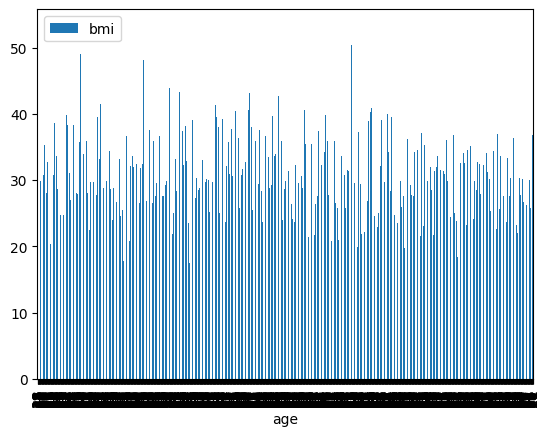

In [40]:
dataset.plot(kind='bar',x='age',y='bmi')

constructing a heatmap to understand the correlation

<Axes: >

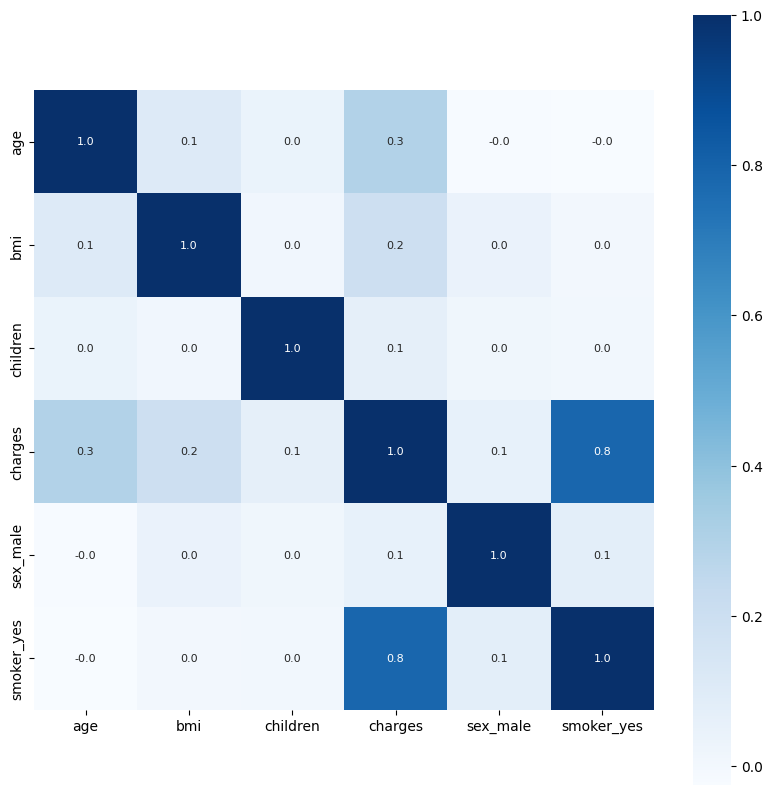

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

axis = 1  if drop column
axis = 0  if drop row

In [43]:
X = dataset.drop(['charges'],axis=1)
Y = dataset['charges']

In [44]:
X.shape

(1338, 5)

In [47]:
X.head(5)

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,False,True
1,18,33.770,1,True,False
2,28,33.000,3,True,False
3,33,22.705,0,True,False
4,32,28.880,0,True,False


In [45]:
Y.shape

(1338,)

splitting data into traning and testing

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
X_train.shape,X_test.shape

((1070, 5), (268, 5))

In [23]:
Y_train.shape,Y_test.shape

((1070,), (268,))

In [49]:
model = LinearRegression()

In [50]:
model.fit(X_train,Y_train)

LinearRegression()

In [52]:
trainingDataPredict = model.predict(X_test)

In [53]:
trainingDataPredict

array([ 1.47210748e+03,  1.14636462e+04,  1.00143532e+04,  2.56676107e+03,
        7.88398794e+03,  1.12622544e+04,  3.25280640e+03,  6.24826810e+02,
        1.19593631e+04,  9.27578009e+03,  1.13684673e+04,  5.11710470e+03,
        3.03249444e+04,  9.60656949e+00,  1.22320622e+04,  1.35861822e+04,
        3.75182356e+03,  7.53422753e+03,  2.97817354e+04,  2.23529727e+03,
        1.21801070e+04,  2.38951835e+03,  3.45257902e+04,  3.16252424e+04,
        3.05238870e+04,  9.22595359e+03,  1.87141090e+03,  1.54373516e+04,
        6.58757274e+03,  1.84981337e+03,  9.70856557e+03,  5.45368639e+03,
        4.59955694e+03,  4.74248037e+03,  9.97967169e+03,  4.81173014e+03,
        3.00134206e+04,  6.90314481e+03,  2.71127918e+04,  1.43179159e+04,
        5.62770481e+01,  2.84561832e+04,  7.59907728e+03,  1.61075824e+03,
        1.05232874e+04,  8.07796659e+03,  1.13311898e+04,  8.39843885e+03,
        1.09259994e+04,  1.38358726e+04,  5.65619847e+03, -5.41351162e+02,
        2.59920350e+04,  

In [60]:

X_train.shape

(1070, 5)

In [64]:
score_1 = metrics.r2_score(Y_test,trainingDataPredict)
# mean value
score_2 = metrics.mean_absolute_error(Y_test,trainingDataPredict)

In [67]:
print(score_1)
print(score_2)

0.7428803779811104
4261.938703683667


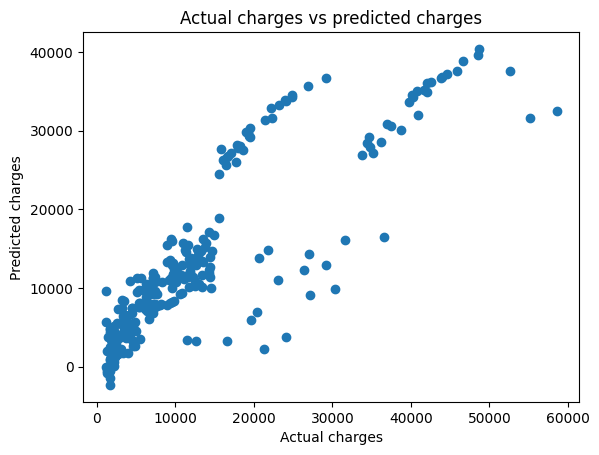

In [70]:
plt.scatter(Y_test,trainingDataPredict)
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Actual charges vs predicted charges')
plt.show()